<div class="alert alert-success" role="alert">
    <p style = 'text-align:center; font-size:250%; font-weight: bold'>Regresi dan Tree</p><br>
    <p style = 'text-align:center; font-size:150%; font-weight: 700'>Author: Andrean Yonathan</p>
</div>

# Latihan (1)

### Melakukan import library yang dibutuhkan

In [1]:
# import library pandas
import pandas as pd 

# Import library numpy
import numpy as np

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# me-non aktifkan peringatan pada python
import warnings 
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
#Panggil file (load file bernama CarPrice_Assignment.csv) dan simpan dalam dataframe
dataset = 'Iris_AfterClean.csv'
iris = pd.read_csv(dataset)

In [3]:
# tampilkan 5 baris data 
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.6,3.1,1.5,0.2,Iris-setosa
1,5.0,3.6,1.4,0.2,Iris-setosa
2,5.4,3.9,1.7,0.4,Iris-setosa
3,4.9,3.1,1.5,0.1,Iris-setosa
4,5.4,3.7,1.5,0.2,Iris-setosa


# Latihan (2)

### definisi variabel X(feature kolom) dan y(species/label):

In [4]:
X=iris.iloc[:, 0:3].values
y=iris.iloc[:, 4].values

# Latihan (3)

### transform label data species dengan menggunakan library LabelEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Building Machine Learning Models

# Latihan (4)

### import library dalam kebutuhan membangun model 

In [6]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import Library Confussion Matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score

# Import Library Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# from sklearn import linear_model
from sklearn import linear_model

### Splitting The Data into Training And Testing Dataset
![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2018/08/1-16.png)

# Latihan (5)

### split data train dan test dengan function train_test_split() dengan train_size=0.7, test_size=0.3 dan random_state=0

In [7]:
#Train and Test split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Latihan (6)

### Bangun model Random Forest dan akurasi nya

In [8]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision = precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n', cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[12  0  0]
 [ 0 13  2]
 [ 0  0 15]]
accuracy_random_Forest : 0.952
precision_random_Forest : 0.952
recall_random_Forest : 0.952
f1-score_random_Forest : 0.952


# Latihan (7)

### Visualisasikan Nilai Confusion Matrix dari Model Random Forest

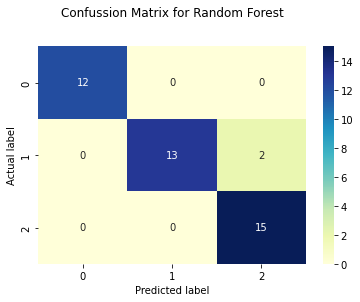

In [9]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, Y_prediction)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confussion Matrix for Random Forest', pad=30)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

# Latihan (8)

### Bangun model DecisionTreeClassifier dan akurasi nya

In [10]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n', cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for DecisionTree
 [[12  0  0]
 [ 0 12  3]
 [ 0  2 13]]
accuracy_random_Forest : 0.881
precision_random_Forest : 0.881
recall_random_Forest : 0.881
f1-score_random_Forest : 0.881


# Latihan (9)

### Visualisasikan Nilai Confusion Matrix dari Model Decision Tree

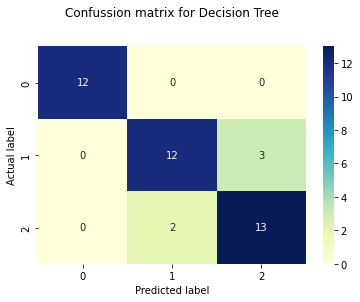

In [11]:
from sklearn import metrics
cdt = metrics.confusion_matrix(y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cdt), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confussion matrix for Decision Tree', pad=30)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

# Latihan (10)

### Plot hasil model DecisionTreeClassifier dengan library plot_tree

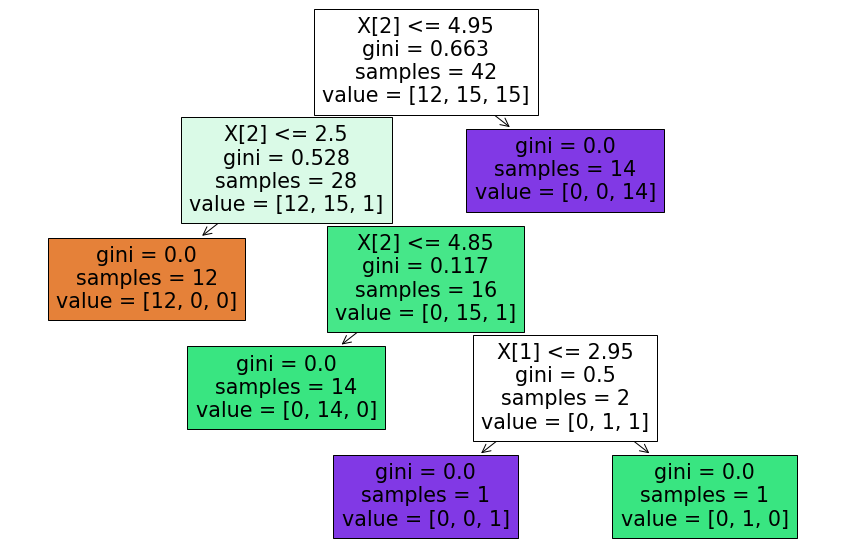

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_test,y_test) ,filled=True)
plt.show()